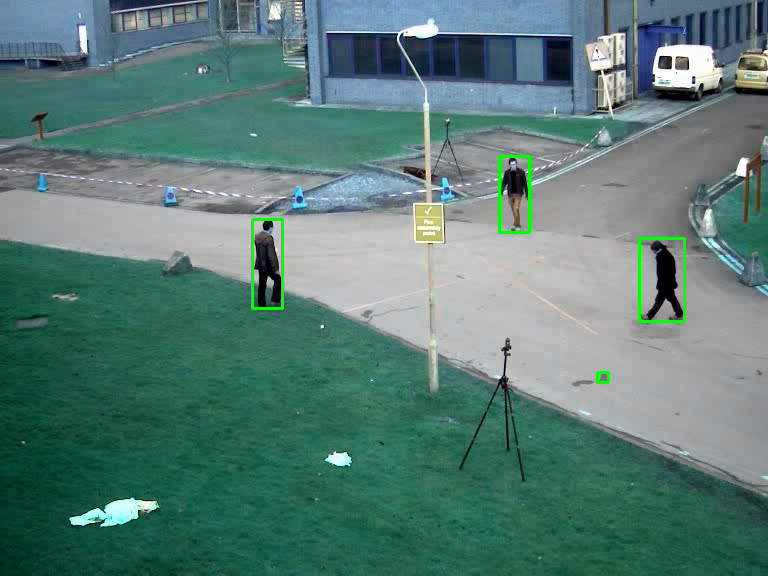

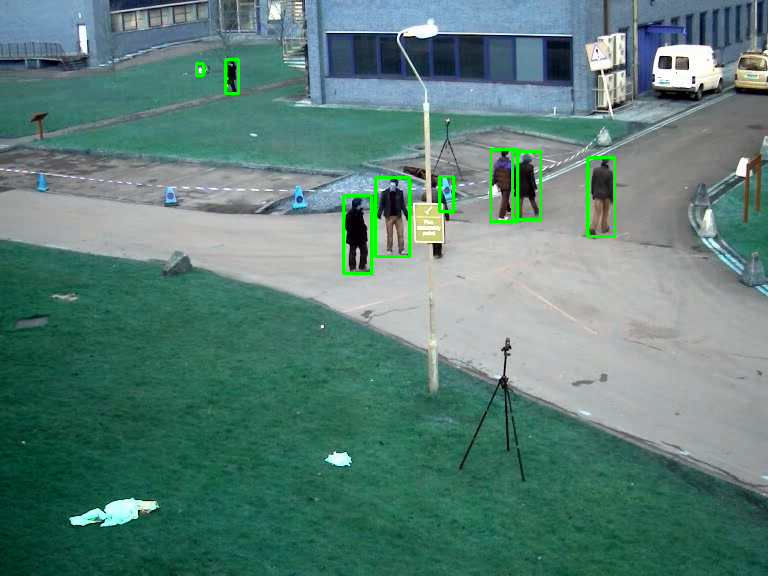

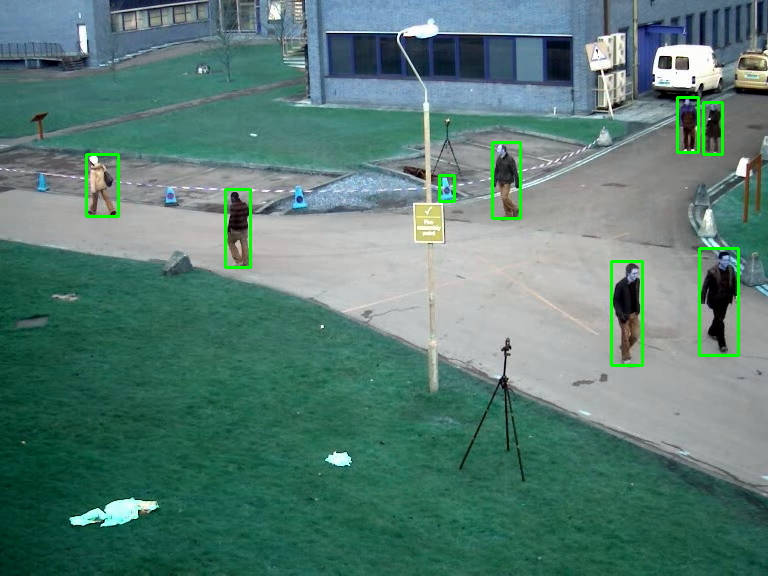

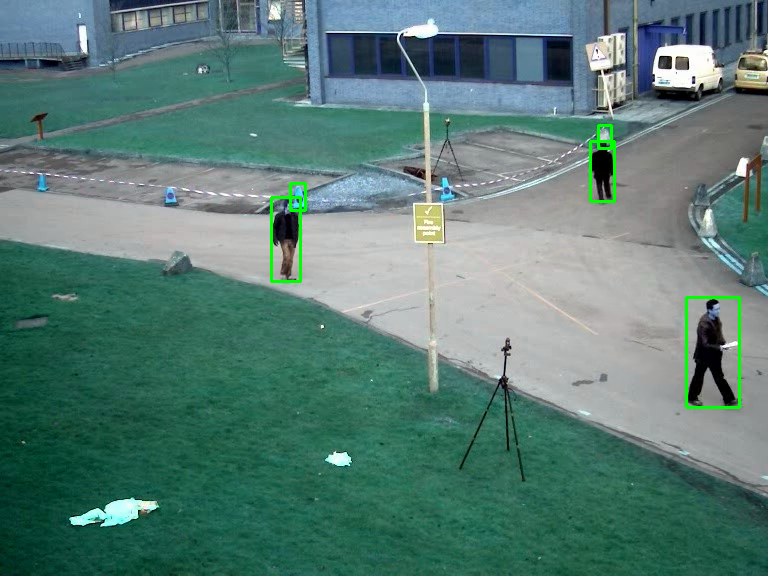

In [6]:
import torch
import torchvision
import cv2
import numpy as np

from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torchvision.ops import nms
from google.colab.patches import cv2_imshow



# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the video sequence
video_path = 'sample_data/PETS09-S2L1-raw.webm'
capture = cv2.VideoCapture(video_path)
frames_to_display = [1, 100, 200, 400]

current_frame = 0

while capture.isOpened():
    ret, frame = capture.read()
    if not ret:
        break

    current_frame += 1

    #Process only the frames in frames_to_display
    if current_frame in frames_to_display:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img_tensor = F.to_tensor(frame_rgb).unsqueeze(0)

        #Detect objects in the frame
        with torch.no_grad():
            detections = model(img_tensor)

        #Convert tensors to numpy arrays
        boxes = detections[0]['boxes'].cpu().numpy()
        scores = detections[0]['scores'].cpu().numpy()
        labels = detections[0]['labels'].cpu().numpy()

        #Filter detections for label 1
        mask = (labels == 1)
        boxes = boxes[mask]
        scores = scores[mask]

        #Apply non-maximum suppression for ooverlapping boxes
        keep = nms(torch.from_numpy(boxes), torch.from_numpy(scores), iou_threshold=0.2).cpu().numpy()

        #Draw bounding boxes on the frame
        for idx in keep:
            box = boxes[idx].astype(int)
            cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

        #Display the frame with bounding boxes
        cv2_imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

        if cv2.waitKey(0) & 0xFF == ord('q'):
            break

#Release the video capture and close all OpenCV windows
capture.release()
cv2.destroyAllWindows()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


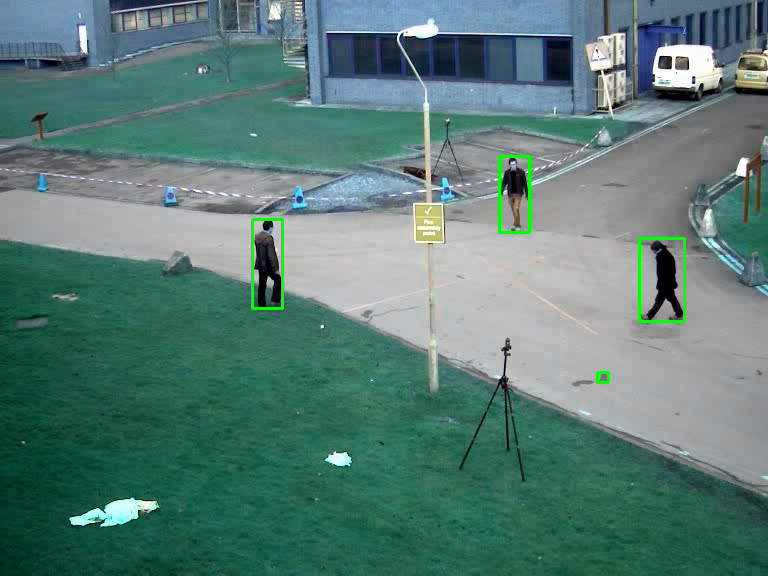

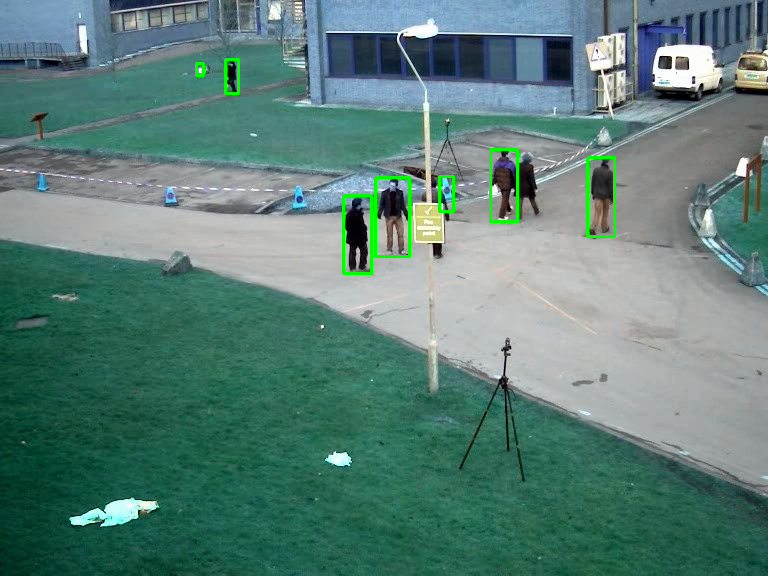

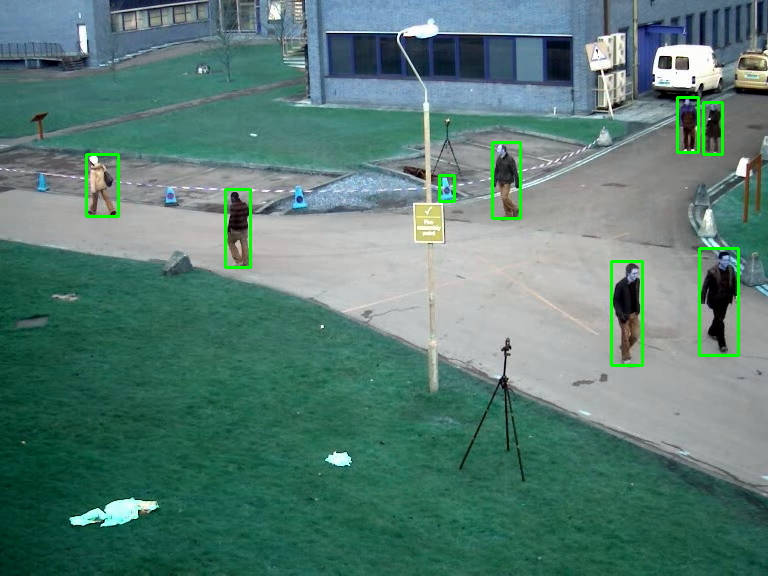

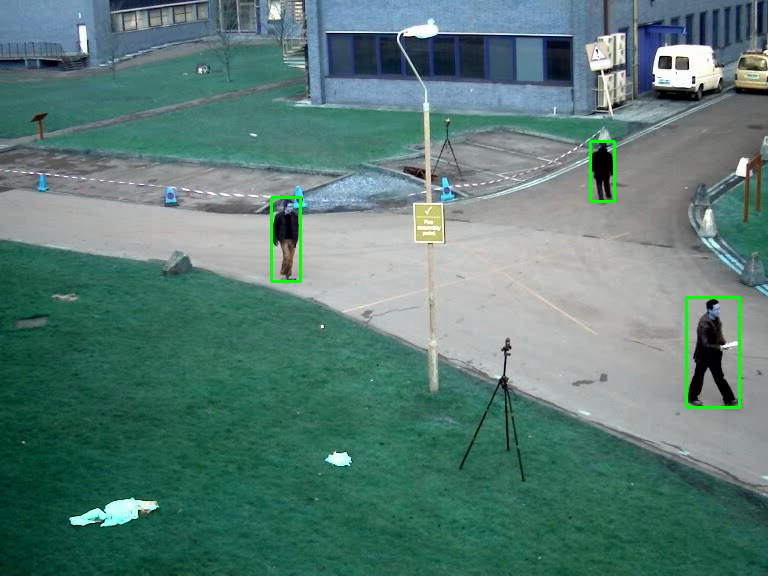

In [13]:
import torch
import torchvision
import cv2
import numpy as np

from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torchvision.ops import nms
from google.colab.patches import cv2_imshow



# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the video sequence
video_path = 'sample_data/PETS09-S2L1-raw.webm'
capture = cv2.VideoCapture(video_path)
frames_to_display = [1, 100, 200, 400]

current_frame = 0

while capture.isOpened():
    ret, frame = capture.read()
    if not ret:
        break

    current_frame += 1

    #Process only the frames in frames_to_display
    if current_frame in frames_to_display:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img_tensor = F.to_tensor(frame_rgb).unsqueeze(0)

        #Detect objects in the frame
        with torch.no_grad():
            detections = model(img_tensor)

        #Convert tensors to numpy arrays
        boxes = detections[0]['boxes'].cpu().numpy()
        scores = detections[0]['scores'].cpu().numpy()
        labels = detections[0]['labels'].cpu().numpy()

        #Filter detections for label 1
        mask = (labels == 1)
        boxes = boxes[mask]
        scores = scores[mask]

        #Apply non-maximum suppression for ooverlapping boxes
        keep = nms(torch.from_numpy(boxes), torch.from_numpy(scores), iou_threshold=0.02).cpu().numpy()

        #Draw bounding boxes on the frame
        for idx in keep:
            box = boxes[idx].astype(int)
            cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

        #Display the frame with bounding boxes
        cv2_imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

        if cv2.waitKey(0) & 0xFF == ord('q'):
            break

#Release the video capture and close all OpenCV windows
capture.release()
cv2.destroyAllWindows()
